*Note: This file is provided in two formats: 
Python (simpleExample.py) and a Jupyter iPython 
notebook (simpleExample.ipynb).  The 
iPython notebook opens in a web browser and 
includes plots in an interactive format.  To 
open the .ipynb file, run:*
    
    jupyter notebook simpleExample.ipynb

*To run the .py file in iPython at the command line, run:*

    ipython --pylab
    %run simpleExample.py
    show()

simpleExample.ipynb
-------------------

- Bryan Daniels

- 1.29.2014
- updated 1.18.2019

- Uses a simple 1D harmonic oscillator example to demonstrate usage of SirIsaac.

In [1]:
import scipy, pylab
from SirIsaac import fittingProblem
%matplotlib inline

Load example data
-----------------

In the example data file, we have four columns, each with 100 data points, listing:

* Initial condition *x_init*
* Measurement time *t*
* Measurement value *x*
* Measurement uncertainty (standard deviation)

In [2]:
data = scipy.loadtxt('simpleExample_data.txt')

We now put this in a format compatible with SirIsaac.  First we make a list of input values (in this case initial conditions):



In [3]:
indepParamsList = [ [ expt[0] ] for expt in data ]

In [4]:
indepParamsList[:3]

[[1.1272274339047885], [1.403399302209734], [1.140086651015479]]

Next, we have a corresponding list of data taken at each of those input values, in the format below.  In this case, we only have one variable *x*.  (Note: In general, multiple timepoints could be also be measured at each input value; in all of our examples, we measure all variables at a single timepoint per input value.)

In [5]:
# [ {'var1': { time0: ( value, uncertainty ) },
#    'var2': { time0: ( value, uncertainty ) },
#     ... },
#   {'var1': { time1: ( value, uncertainty ) },
#    'var2': { time1: ( value, uncertainty ) },
#     ... },
#   ... ]

In [6]:
sirIsaacData = []
for expt in data:
    sirIsaacData.append( { 'x': { expt[1]: ( expt[2], expt[3] ) } } )

In [7]:
sirIsaacData[:3]

[{'x': {0.5454701510335127: (1.2623428576416922, 0.1)}},
 {'x': {0.17186531503221092: (2.018996005787428, 0.1)}},
 {'x': {0.8529318094853018: (1.371899809743871, 0.1)}}]

Finally, SirIsaac will need to know what to call the input and output values.  In this case, the input corresponds to the initial value of *x*.  The way to indicate this to SirIsaac is by using the name 'x_init', where 'x' is the name of the corresponding variable.

Here we have one input and one output:

In [8]:
outputNames = ['x']
indepParamNames = ['x_init']

Create SirIsaac FittingProblem
------------------------------

We'll attempt to fit a model in the power law class.  To do this, we'll create an instance of a PowerLawFittingProblem.  Here we set up its arguments and create it:

In [9]:
# complexityList lists which models in the model class may be tested.
# (Note that by default SirIsaac will still stop once 3 models have 
#  smaller estimated log-likelihood.)
complexityStepsize = 2 # increase complexity with steps of size 2
complexityMax = 25 # don't try models with complexity > 25
complexityList = range(0,complexityMax,complexityStepsize) 

# ensGen controls the generation of the initial ensemble of 
# parameter starting points.
totalSteps = 1e3
keepSteps = 10
seeds = (1,1) # use a fixed random seed
ensTemperature = 100.
ensGen = fittingProblem.EnsembleGenerator( totalSteps, keepSteps,
    temperature=ensTemperature, seeds=seeds )

# Parameters that control when local fitting stops.
avegtol = 1e-2
maxiter = 100

# priorSigma controls the width of priors on all parameters
priorSigma = 3.

# If you have pypar installed, you can run on multiple processors
numprocs = 10

# We'll only use a subset of our data to make the example run faster
N = 20

p = fittingProblem.PowerLawFittingProblem( complexityList, 
    sirIsaacData[:N], indepParamsList=indepParamsList[:N], 
    outputNames=outputNames, indepParamNames=indepParamNames, 
    ensGen=ensGen, avegtol=avegtol, maxiter=maxiter,
    priorSigma=priorSigma, numprocs=numprocs, verbose=True )

Run parameter fitting
---------------------

The bulk of computation time is used to fit the parameters of each model to the data.  Uncomment the following lines to run the parameter fitting, which takes a few hours using 10 processors.  Or skip ahead to load a version that has already been fit.

In [11]:
## Uncomment to run parameter fitting.
#p.fitAll()
#
#fittingProblem.save(p,'simpleExample_savedFittingProblem.data')

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFIC02TJ318GTFL_local_78_1516877451_97613" sources
f2py options: []
f2py: PowerLaw_Network_0_SFIC02TJ318GTFL_local_78_1516877451_97613.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFIC02TJ318GTFL_local_78_1516877451_97613.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFIC02TJ318GTFL_local_78_1516877451_97613
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules...
	Building module "PowerLaw_Network_0_SFIC02TJ318GTFL_local_78_1516877451_97613"...
		Constructing wrapper function "res_function"...
		  residual = res_function(tim

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_beta_0', 'g_0_0']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 463.29596823160387 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.29597661351437 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.2959806337642 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.2959809664559 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.2969409763405 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.29597955284424 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 439.9562859543664 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.29597660805985 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 439.9562736030211 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 439.9568736587113 ( 2 )
SloppyCellFittingModel.fitToData: Best-fit cost =  439.9562736030211
fittingProblem.fitAll: L = -224.07812402405023
running build_ext
running bu

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 417.6198647882622 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4515571008649 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4524423130301 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4513122768163 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4514158686584 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4514378048048 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4514967636858 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4513117014626 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 417.6198681162665 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 269.23106183513136 ( 0 )
SloppyCellFittingModel.fitToData: Best-fit cost =  269.23106183513136
fittingProblem.fitAll: L = -139.0931987303462
running

***STDOUT***

***STDERR***

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'g_1_1']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 514.4514204930964 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 269.23098186298137 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 483.2283928990116 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 269.2310789044734 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4538657829918 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4513290001779 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 417.62106324081566 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 417.621113970818 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 269.2313073777365 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 269.230922461989 ( 2 )
SloppyCellFittingModel.fitToData: Best-fit cost =  269.230922461989


/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/SloppyCell-1.1.0.dev1-py2.7-macosx-10.7-x86_64.egg/SloppyCell/ReactionNetworks/Dynamics.py:711: RuntimeWarning: divide by zero encountered in divide
  ypIC[N_dyn_vars:] /= net.get_var_ic(opt_var)


fittingProblem.fitAll: L = -139.09634792180137
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFIC02TJ318GTFL_local_19_4666877451_97613" sources
f2py options: []
f2py: PowerLaw_Network_0_SFIC02TJ318GTFL_local_19_4666877451_97613.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFIC02TJ318GTFL_local_19_4666877451_97613.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFIC02TJ318GTFL_local_19_4666877451_97613
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-p

***STDOUT***

***STDERR***

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'g_1_1', 'g_1_0', 'h_1_0']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 514.451318940746 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4513122184131 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4513116767732 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4620690491455 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 335.07885145698464 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 514.4514592524513 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 429.3439392969521 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 456.7944348828198 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 93.5555708736856 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 269.23087874436294 ( 2 )
SloppyCellFittingModel.fitToData: Best-fit cost =  

***STDOUT***

***STDERR***

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'log_beta_1', 'g_1_1', 'h_1_1', 'g_1_0', 'h_1_0']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 92.33707894699124 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 93.4130239198142 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 75.90217365427932 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 75.90700785765307 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 78.57472517238354 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 93.41526383310676 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 93.4133823719689 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 93.41407096349313 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 234.9808730329368 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 93.4134605335877 ( 2 )
SloppyCellFittingModel.fitToDat

***STDOUT***

***STDERR***

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'g_0_2', 'log_alpha_1', 'log_beta_1', 'g_1_1', 'h_1_1', 'g_1_0', 'h_1_0', 'g_2_2']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 444.3799785665445 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 435.7434193107574 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 444.35267932399546 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 442.3408816865558 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 75.94983355208664 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 31.923378620235503 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 125.78076054692546 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 76.04679560959686 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 76.34270989897986 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 75.9023959254801

***STDOUT***

***STDERR***

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'g_0_2', 'h_0_2', 'log_alpha_1', 'log_beta_1', 'g_1_1', 'h_1_1', 'g_1_0', 'h_1_0', 'g_2_2', 'g_2_0']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 309.7793318440455 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 36.88967284799619 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 25.395327997705873 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 88.02293484999605 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 25.395067207564026 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 25.39493579826406 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 25.203699530294365 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 25.395329372473206 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 20.11637952587821 ( 2 )
SloppyCellFittingModel.fitToData: Cost



***STDERR***

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'g_0_2', 'h_0_2', 'log_alpha_1', 'log_beta_1', 'g_1_1', 'h_1_1', 'g_1_0', 'h_1_0', 'g_1_2', 'g_2_2', 'g_2_0', 'h_2_0']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 83.85302422353489 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 96.03976148782336 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 795.7522163063499 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 252.39303201552423 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 82.69575770858674 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 300.2855008014545 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 301.9796578020247 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 36.17045401622916 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 18.764688610590934 ( 2 )
SloppyCellFittingModel.fitToData: 

***STDOUT***

***STDERR***

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'g_0_2', 'h_0_2', 'log_alpha_1', 'log_beta_1', 'g_1_1', 'h_1_1', 'g_1_0', 'h_1_0', 'g_1_2', 'h_1_2', 'g_2_2', 'g_2_0', 'h_2_0', 'g_2_1']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 46.33660403465042 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 73.46406889716972 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 58.87892254615015 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 95.40946671991203 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 84.84227092495524 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 436.8106106191076 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 346.1331288086608 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 183.12190843098935 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 79.34604964579019 ( 4 )
Slopp

In [10]:
# Load saved version of fittingProblem that has already been fit.
p = fittingProblem.load('simpleExample_savedFittingProblem.data')

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_0918287451_12930" sources
f2py options: []
f2py: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_0918287451_12930.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_0918287451_12930.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_0918287451_12930
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules...
	Building module "PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_0918287451_12930"...
		Constructing wrapper function "res

52 warnings generated.
gcc -bundle -undefined dynamic_lookup -L/Users/bryandaniels/anaconda2/lib -arch x86_64 -arch x86_64 build/temp.macosx-10.6-x86_64-2.7/PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_0918287451_12930.o build/temp.macosx-10.6-x86_64-2.7/PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_0918287451_12930module.o build/temp.macosx-10.6-x86_64-2.7/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/SloppyCell-1.1.0.dev1-py2.7-macosx-10.7-x86_64.egg/SloppyCell/ReactionNetworks/mtrand.o build/temp.macosx-10.6-x86_64-2.7/build/src.macosx-10.6-x86_64-2.7/fortranobject.o -L/Users/bryandaniels/anaconda2/lib -o PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_0918287451_12930.so
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_91_2918287451_12930" sources
f2py options: []
f2py: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_91_2918287451_12930.pyf
Reading fortran codes...
	Reading file 'Pow

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_83_3918287451_12930" sources
f2py options: []
f2py: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_83_3918287451_12930.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_83_3918287451_12930.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_83_3918287451_12930
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_1_1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules...
	Building mo

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_86_4918287451_12930" sources
f2py options: []
f2py: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_86_4918287451_12930.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_86_4918287451_12930.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_86_4918287451_12930
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_20_6918287451_12930" sources
f2py options: []
f2py: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_20_6918287451_12930.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_20_6918287451_12930.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_20_6918287451_12930
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Blo

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_7918287451_12930" sources
f2py options: []
f2py: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_7918287451_12930.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_7918287451_12930.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_7918287451_12930
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_0_2
			Block: dres_dlog_alpha_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: dres_dg_2_2
			Block: sens_rhs
			Block: res_

gcc: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_7918287451_12930module.c
In file included from PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_7918287451_12930module.c:16:
In file included from build/src.macosx-10.6-x86_64-2.7/./fortranobject.h:13:
In file included from /Users/bryandaniels/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/bryandaniels/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18:
In file included from /Users/bryandaniels/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1816:
/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: "Using deprecated NumPy API, disable it by "          "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it by " \
 ^
PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_44_791828

481 warnings generated.
gcc: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_0_9918287451_12930module.c
In file included from PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_0_9918287451_12930module.c:16:
In file included from build/src.macosx-10.6-x86_64-2.7/./fortranobject.h:13:
In file included from /Users/bryandaniels/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/bryandaniels/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18:
In file included from /Users/bryandaniels/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1816:
/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: "Using deprecated NumPy API, disable it by "          "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it by " \
 ^
PowerLaw_Network_0_sfic02tj318gtfl_mo

PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_26_0028287451_12930.c:198:8: warning: unused variable 'time' [-Wunused-variable]
double time = *time_ptr;
       ^
PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_26_0028287451_12930.c:200:8: warning: unused variable 'Comp' [-Wunused-variable]
double Comp = constants[0];
       ^
PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_26_0028287451_12930.c:201:8: warning: unused variable 'n' [-Wunused-variable]
double n = constants[1];
       ^
PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_26_0028287451_12930.c:210:8: warning: unused variable 'x_init' [-Wunused-variable]
double x_init = constants[10];
       ^
PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_26_0028287451_12930.c:219:8: warning: unused variable 'X_1_init' [-Wunused-variable]
double X_1_init = constants[19];
       ^
PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_26_0028287451_12930.c:226:8: warning: unused variable 'X_2_init' [-Wunused-variable]
double X_2_init = co

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_73_2028287451_12930" sources
f2py options: []
f2py: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_73_2028287451_12930.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_73_2028287451_12930.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_sfic02tj318gtfl_mobile_asu_edu_73_2028287451_12930
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_0_2
			Block: dres_dh_0_2
			Block: dres_dlog_alpha_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: dres_dg_1_2
			Block: d

Analyze the selected model
--------------------------

Here we plot predicted timecourses from the selected model for the first 10 in-sample initial conditions, using plotBestModelResults:

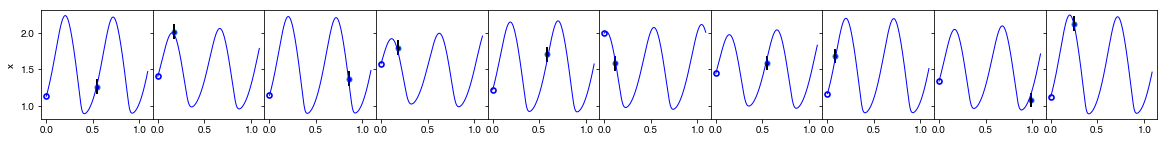

In [11]:
pylab.figure(figsize=(20,2))
p.plotBestModelResults(plotInitialConditions=True,indices=range(10));

And now for out-of-sample data:

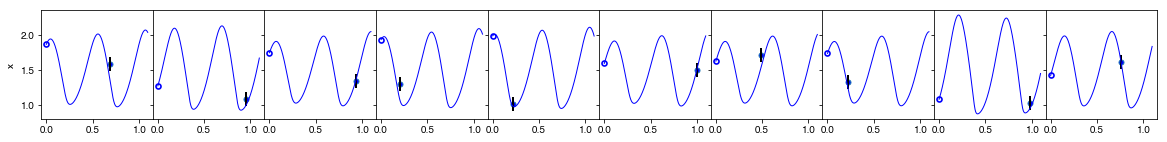

In [12]:
pylab.figure(figsize=(20,2))
m = p.getBestModel()
m.plotResults(sirIsaacData[20:30],indepParamsList[20:30],
              plotInitialConditions=True,plotFittingData=True);

We can look at the selected model's parameters:

In [13]:
m = p.getBestModel()
print m.getParameters()

[
('log_alpha_0', 1.448499956554572),
('log_beta_0', -2.7421668745158065),
('g_0_0', 0.5733726369364367),
('h_0_0', 6.113657634917001),
('g_0_1', -1.6744640338117187),
('h_0_1', 3.5504480786798562),
('g_0_2', 0.0007681682989298746),
('log_alpha_1', 0.28183083904679274),
('log_beta_1', 1.80143719486644),
('g_1_1', 3.8636025056956003),
('h_1_1', 2.709018461565593),
('g_1_0', 2.1231511392774345),
('h_1_0', -0.7803639346374973),
('g_2_2', -0.026182715641127466),
]


The following will use SloppyCell to output a latex file with the ODEs describing the selected model:

In [14]:
m = p.getBestModel()
fittingProblem.IO.eqns_TeX_file(m.net,filename='simpleExample_selectedModel.tex')

More details
------------

We can examine the dynamics of the hidden nodes as well using plotResults.

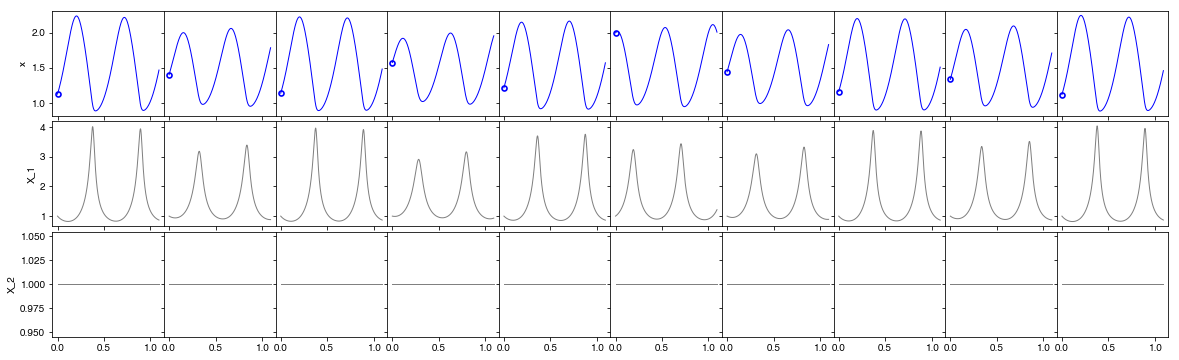

In [15]:
pylab.figure(figsize=(20,6))
m = p.getBestModel()
m.plotResults(p.fittingData[:10],p.indepParamsList[:10],
              plotInitialConditions=True,plotHiddenNodes=True);

We have access to raw trajectories using evaluateVec.  Here we use this to plot a projection of trajectories in phase space for the first in-sample initial conditions:

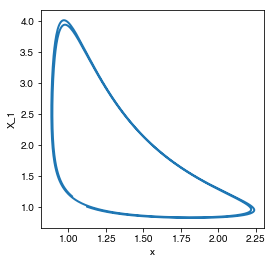

In [16]:
pylab.figure(figsize=(4,4))
times = scipy.linspace(0,1,1000)
xdata = m.evaluateVec(times,'x',p.indepParamsList[0])
X1data = m.evaluateVec(times,'X_1',p.indepParamsList[0])
fittingProblem.Plotting.plot(xdata,X1data)
pylab.xlabel('x')
pylab.ylabel('X_1')

We can also look at other models that SirIsaac fit in searching for the best one.  In this case, 'Model 6' was selected because it has the largest estimated log-likelihood:

In [17]:
for name in p.fittingModelNames:
  if name in p.logLikelihoodDict.keys():
    print name, ': #species =',len(p.fittingModelDict[name].speciesNames),\
                ', #params =',p.numParametersDict[name],\
                ', L =', p.logLikelihoodDict[name]
print
print 'Selected model:',p.maxLogLikelihoodName()

Model 1 : #species = 1 , #params = 2 , L = -224.07812402405023
Model 2 : #species = 1 , #params = 4 , L = -139.0931987303462
Model 3 : #species = 2 , #params = 7 , L = -139.09634792180137
Model 4 : #species = 2 , #params = 9 , L = -66.80402759455359
Model 5 : #species = 2 , #params = 11 , L = -60.71246311542691
Model 6 : #species = 3 , #params = 14 , L = -46.232353901020495
Model 7 : #species = 3 , #params = 16 , L = -48.75294182446126
Model 8 : #species = 3 , #params = 18 , L = -55.785711936594325
Model 9 : #species = 3 , #params = 20 , L = -61.47738413001833

Selected model: Model 6


A model with more parameters fits in-sample data better but out-of-sample data worse:

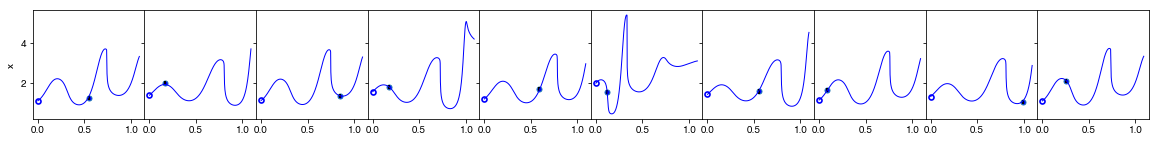

In [18]:
pylab.figure(figsize=(20,2))
m2 = p.fittingModelDict['Model 9']
m2.plotResults(sirIsaacData[:10],indepParamsList[:10],
              plotInitialConditions=True,plotFittingData=True);

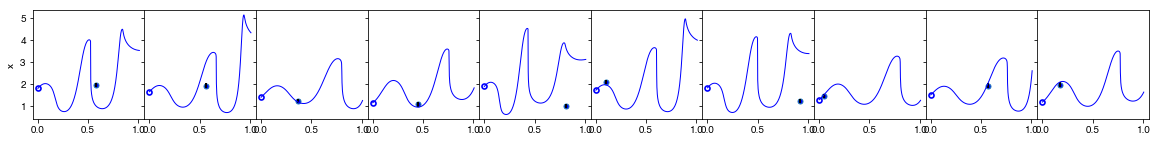

In [19]:
pylab.figure(figsize=(20,2))
m2.plotResults(sirIsaacData[30:40],indepParamsList[30:40],
              plotInitialConditions=True,plotFittingData=True);

Also potentially useful is the Hessian at the best-fit parameters:

In [20]:
hess = p.HessianDict[p.maxLogLikelihoodName()]
u,singVals,vt = scipy.linalg.svd( hess )
scipy.sort(singVals)

array([1.11111111e-01, 1.11111111e-01, 1.26611990e-01, 1.46913301e-01,
       2.67699534e-01, 1.05570785e+00, 1.16739326e+00, 7.83431246e+00,
       1.76391726e+01, 3.02708880e+01, 1.75268088e+02, 7.55975517e+02,
       1.89813671e+04, 5.22043947e+04])

Other details about what happened during parameter fitting are stored within each fittingModel:

In [21]:
m = p.getBestModel()
print "Acceptance ratio for initial parameter ensemble =",m.acceptanceRatio
c = sum(scipy.array(m.currentResiduals(p.fittingData,p.indepParamsList,includePriors=False))**2)
print "Sum of squared residuals at best-fit (without priors) =",c
print "Convergence flags for local fits:",m.convFlagList
print "Number of cost evaluations for local fits:",m.numCostCallsList
print "Number of gradient evaluations for local fits:",m.numGradCallsList

Acceptance ratio for initial parameter ensemble = 0.95
Sum of squared residuals at best-fit (without priors) = 18.848587040639458
Convergence flags for local fits: [0, 4, 2, 0, 0, 1, 1, 4, 3, 0]
Number of cost evaluations for local fits: [309, 77, 80, 312, 330, 162, 248, 170, 81, 342]
Number of gradient evaluations for local fits: [101, 25, 25, 101, 101, 43, 71, 56, 26, 101]


Finally, since in this case we know the function used to create the data, we can compare:

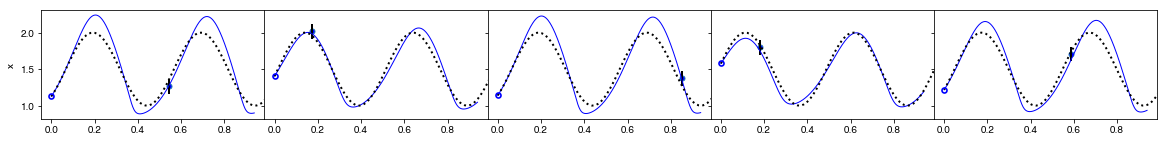

In [22]:
pylab.figure(figsize=(20,2))
indicesToPlot = range(5)
axArray = p.plotBestModelResults(plotInitialConditions=True,indices=indicesToPlot)

# compare to model that generated the data
f = lambda x0,t: 1.5 + 0.5*scipy.sin(4.*scipy.pi*t + scipy.arcsin(2.*x0 - 3.))
for i,indepParams in enumerate(scipy.array(indepParamsList)[indicesToPlot]):
    times = scipy.linspace(0,1,100)
    x0 = indepParams[0]
    fittingProblem.Plotting.sca(axArray[0][i])
    fittingProblem.Plotting.plot(times,f(x0,times),'k:')